<a href="https://colab.research.google.com/github/usaidahmed01/Deep-Learning/blob/master/13Jan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CNN implementation

import tensorflow as tf
from keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

In [ ]:
data, info = tfds.load('cats_vs_dogs', with_info = True , as_supervised = True) # as_supervised gives the tensor and its label


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.HV6D9W_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
data

{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [ ]:
info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, Jo

In [ ]:
train_data = data['train'].take(2000) # only 2000 images for training if we select all (poora din guzar jayega)
val_data = data['train'].skip(2000).take(1000) # first skip starting 2000 then assign

def preprocess(image , label):
    image = tf.image.resize(image , (150 , 150))
    image = image / 255
    return image , label

train_data = train_data.map(preprocess).batch(32)
val_data = val_data.map(preprocess).batch(32)

# .map and .batch are used because sirf dataset mein images nahi balek unke sath unke labels bhi hain tou if we direct put the train data into the preprocess function tou wo error dedega instead use map jissay eke eke element pr jayega then batch 32 means 32 images at a time then move on


In [ ]:
# first convolution layer then maxpool layer
model = models.Sequential([
    layers.Conv2D(32 , (3 , 3), activation = 'relu' , input_shape = (150 , 150 , 3)),
    layers.MaxPooling2D((2 , 2)),
    # 32 is the quantity of filter, size of pixels 3,3 , 2,2 in maxpooling means pixels

    layers.Conv2D(64 , (3 , 3), activation = 'relu'),
    layers.MaxPooling2D((2 , 2)),

    layers.Conv2D(128, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128 , activation = 'relu'),
    layers.Dense(1 , activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(train_data , epochs = 5 , validation_data = val_data)



Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.5153 - loss: 0.7402 - val_accuracy: 0.5320 - val_loss: 0.6875
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.5754 - loss: 0.6775 - val_accuracy: 0.6550 - val_loss: 0.6426
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.6722 - loss: 0.6098 - val_accuracy: 0.6680 - val_loss: 0.6976
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.7340 - loss: 0.5424 - val_accuracy: 0.6700 - val_loss: 0.6965
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.7760 - loss: 0.4672 - val_accuracy: 0.6550 - val_loss: 0.8086


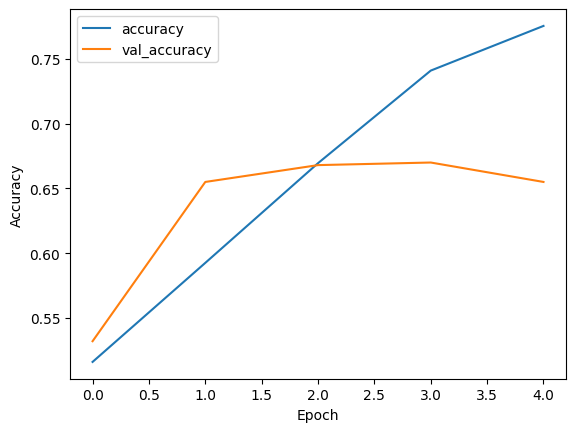

In [ ]:
plt.plot(history.history['accuracy'] , label = 'accuracy')
plt.plot(history.history['val_accuracy'] , label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
from keras.preprocessing import image

dog = image.load_img('dog.jpg', target_size = (150 , 150))
dog_arr = image.img_to_array(dog)
dog_arr = dog_arr / 255.0
dog_arr = np.expand_dims(dog_arr , axis = 0)
prediction = model.predict(dog_arr)

if(prediction[0][0]>0.5):
    print('This looks like a dog ' , prediction[0][0])
else:
    print('This looks like a cat')


# The line dog_arr = np.expand_dims(dog_arr, axis=0) is used to add an extra dimension to your image array. Convolutional Neural Networks (CNNs) in Keras (and TensorFlow) typically expect input images in a batch format, even if you are only predicting on a single image. The expected shape for a single image with color channels would be (batch_size, height, width, channels). When you load and preprocess a single image, its shape is usually (height, width, channels). By using np.expand_dims(dog_arr, axis=0), you are transforming the shape from (height, width, channels) to (1, height, width, channels), effectively creating a 'batch' of one image. This allows the model to correctly process the single image.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
This looks like a dog  0.76934123
